<center><font size="+4">Programming & Data Analytics & AI 2 PM 2024/2025</font></center>
<center><font size="+2">Sant'Anna School of Advanced Studies, Pisa, Italy</font></center>
<center><img src="https://github.com/EMbeDS-education/ComputingDataAnalysisModeling20242025/raw/main/PDAI/jupyter/jupyterNotebooks/images/sssaLEMBEDSdtu.png" width="900" alt="L'EMbeDS"></center>

<center><font size="+2">Course responsible</font></center>
<center><font size="+2">Andrea Vandin a.vandin@santannapisa.it</font></center>

---

<center><font size="+2">Notebook for Class 6 </font></center>
<center><font size="+2">Petri nets and Alpha miner. Data Lab
</font></center>

---
---

In [42]:
url_github_repo="https://github.com/EMbeDS-education/ComputingDataAnalysisModeling20242025/raw/main/PDAI/"

In [43]:
#Here we create a 'string' variable pointing to our repository...
url1 = 'https://raw.githubusercontent.com/EMbeDS-education/ComputingDataAnalysisModeling20242025/main/PDAI/jupyter/jupyterNotebooks/L1.csv'
url2 = 'https://raw.githubusercontent.com/EMbeDS-education/ComputingDataAnalysisModeling20242025/main/PDAI/jupyter/jupyterNotebooks/L3.csv'

urls=[url1,url2]

import urllib.request
from pathlib import Path

# for url in urls:
#     print('Downloading',url)
#     urllib.request.urlretrieve(url,Path(url).name)

How good are you with pm4py?
- Let's test it! :D

In [44]:
from IPython.display import IFrame
IFrame("https://kahoot.it/", 500, 400)

For an informed discussion on this topic, I recommend you watching classes from 2.2 to 2.7 of the [Coursera course on PM](https://www.coursera.org/learn/process-mining/home/welcome)
- https://www.coursera.org/learn/process-mining/lecture/XGSCe/2-2-petri-nets-1-2



> Below we provide screenshots from some slides used above

In [45]:
pm_slides=url_github_repo+'jupyter/jupyterNotebooks/images/PM/'
from IPython.display import Image, display

# On Petri Nets 

A _good_ course would cover these aspects, from these classes of the Coursera PM course :D:
- (2.2, 2.3) Examples on Petri nets 
- (2.4)
  - Boundedness and safeness 
  - Deadlocks in Petri net
  - Liveness
  - Transition system, Traces, Complete traces
- (2.5)
  - Workflow nets (1 start state, 1 final state)
  -  Soundness
    - Safe: places cannot hold multiple tokens at the same time
    - Proper completion: if the sink place is marked, all other places are empty
      - Implied by Option to complete
    - Option to complete: it is always possible to reach the marking that marks just the sink place
    - Deadlock-free
  - A WF-net is sound iff the corresponding short-circuited PN is live and bounded


> But we are not :D<br/>
> We are not going to cover these notions
> - Just remember: the alpha algorithm, and many discovery algoriwe focus on a _nice_ subclass of Petri nets
>   - One source and one target node
>   - We cannot have two transitions with same name (activity)
>   - No more than 1 token per place
>   - We always get to the sink state (no deadlock), without leaving tokens in the model

...

# (2.6): We learn WF-nets with Alpha miner

## Process discovery

We can _play_ with logs in 3 ways:
- Replay: we execute a log on a model. Often done to check compliance of a trace in a model
- Play-out: we execute a model to create logs
- __Play-in__: we use logs to discover a model!
  -   This is the topic of this section

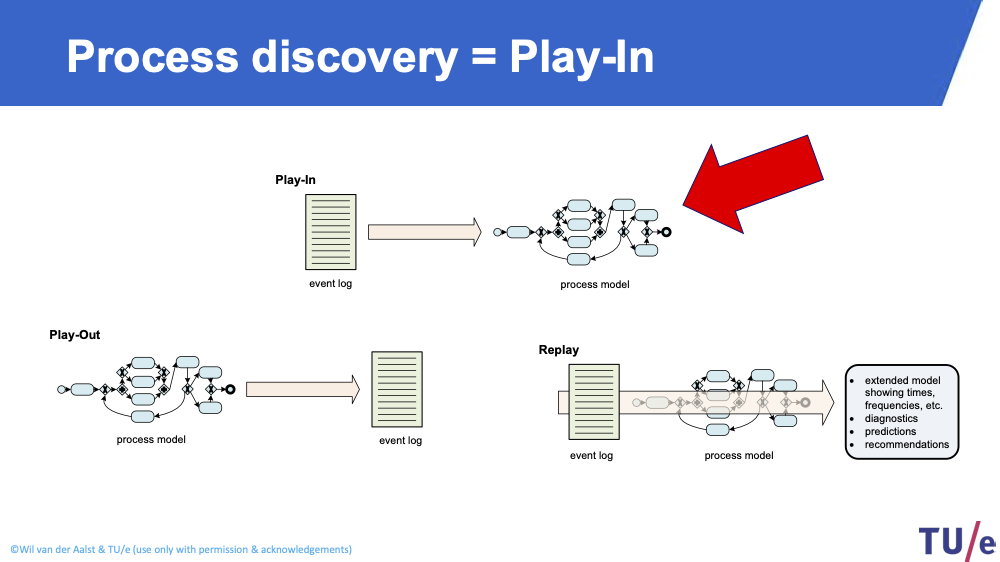

In [46]:
img=Image(pm_slides+'playOut.png',width=700)
display(img)

Typically, process idscovery algorithms take into acocunt just the activity column in event logs
- There are recent ones using also other resources, but we are not going to study them

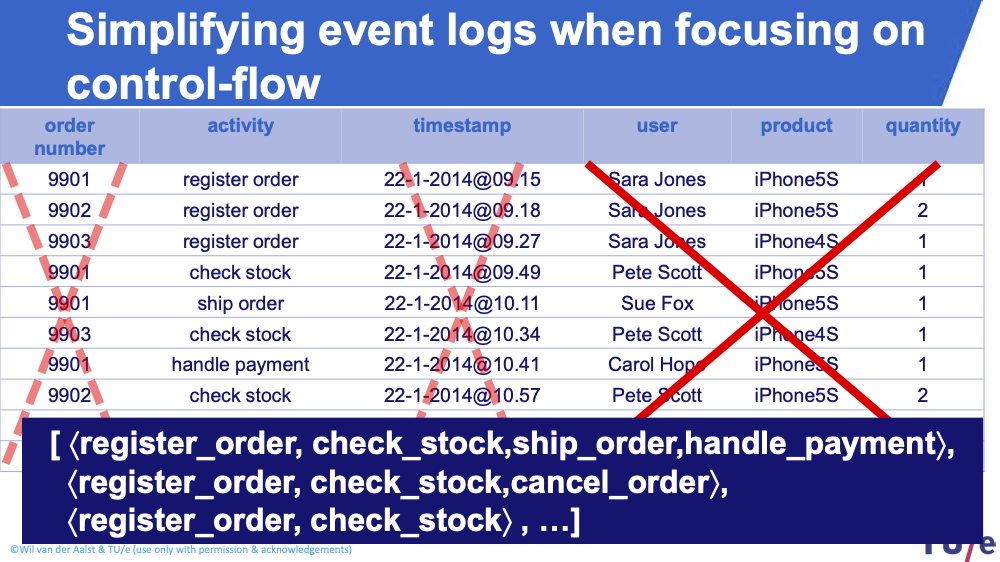

In [47]:
img=Image(pm_slides+'justActivity.png',width=700)
display(img)

A simple event log:
$$L_1 = [<a,b,c,d>,<a,b,c,d>,<a,b,c,d>,\ <a,c,b,d>,<a,c,b,d>,\ <a,e,d>]$$

Or, more compactly
$$L_1 = [<a,b,c,d>^3,\ <a,c,b,d>^2,\ <a,e,d>]$$

By now you should know that:
- A trace is a sequence of activity names 
  - usually, in process discovery we abstract from all other attributes
- An event log is a multiset of traces 
  - traces can appear more than once


Goal of Alpha algorithm
- Strong assumption: the event log is _complete_: it contains all logs of interest
  - Discover a model that can generate precisely all and only the traces in the log
- Realistic assumption: the event log is __not__ _complete_: it contains a subset of all logs of interest
  - Discover a model that can generate all the traces in the log, but also more, based on properties/regularities discovered in the traces

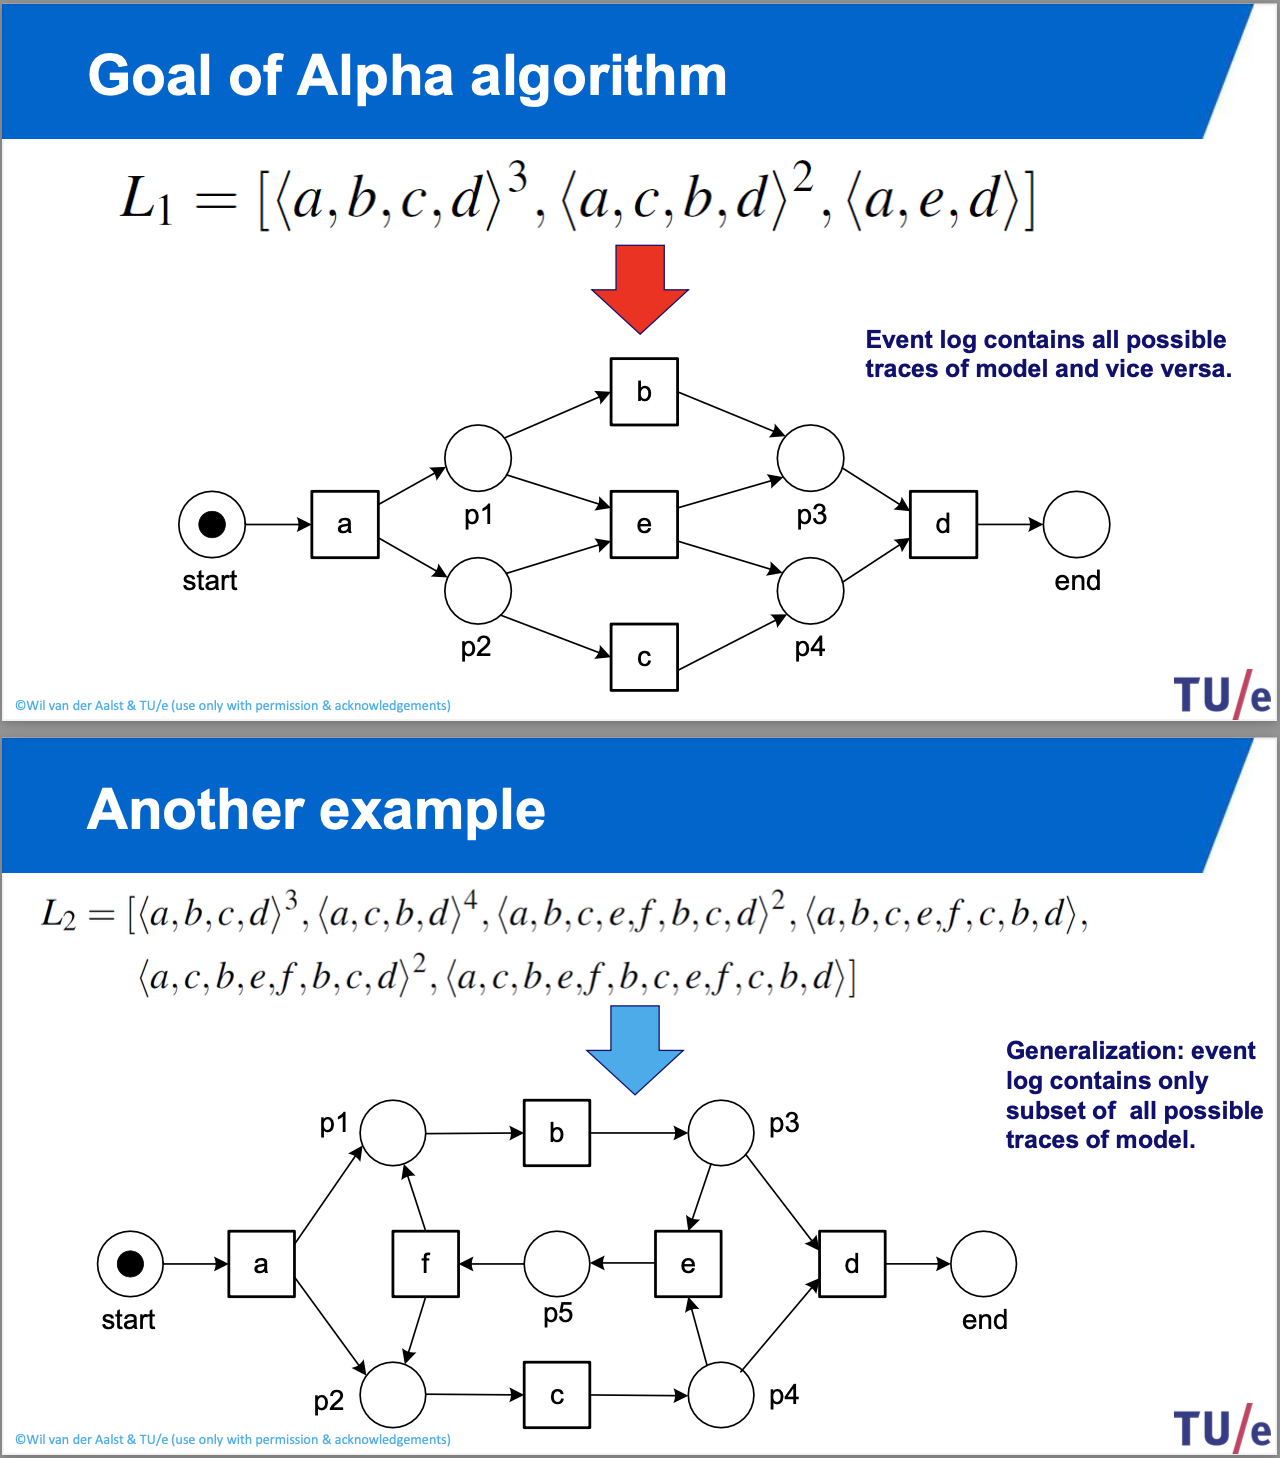

In [48]:
img=Image(pm_slides+'alphaGoal.png',width=700)
display(img)

For example, it may happen that:
- we learn a model able to generate infinitely many traces
  - here we have a _loop_:
    - the execution of `b` and `c` enables `e`
    - the execution of `e` enables `f`
    - the execution of `f` enables `b` and `c`
    - the execution of `b` and `c` enables `e`...

In [49]:
#img=Image(pm_slides+'alphaInfinite.png',width=700)
#display(img)

## Challenges and metrics for process discovery: 
- as usual in Data Science, we have trade offs!

__Fitness__ vs __Simplicity__
- Fitness: Ability to replay the observed behavior
- Simplicity: Keep model simple (Occam's razor)

__Generalization__ vs __Precision__
- Generalization: Avoid overfitting
- Precision: Avoid underfitting



## Alpha miner: the footprint

The alpha algorithm is based on four relations among activities:
- __Direct succession `>`__
  - `a>b`: There is at least one trace where `b` is the next event after `a`
- __Causality `->`__
  - `a->b`: `a>b` __and not__ `b>a`
- __Parallel `||`__
  - `a||b`: `a>b` __and__ `b>a`
- __Choice `#`__
  - `a#b`: __not__ `a>b` __and not__ `b>a`

From $L_1 = [<a,b,c,d>^3,\ <a,c,b,d>^2,\ <a,e,d>]$ we know:


__Direct succession `>`__
- `abcd`
  - `a>b`
  - `b>c`
  - `c>d`
- `acbd`
  - `a>c`
  - `b>d`
  - `c>b`
- `aed`
  - `a>e`
  - `e>d`


__Causality `->`__
- `a->b`
- `a->c`
- `a->e`
- `b->d`
- `c->d`
- `e->d`


__Parallel `||`__
- `b||c` (and `c||b`)

__Choice `#`__
- `b#e` (and `e#b`)
- `c#e` (and `e#c`)
- `a#d` (and `d#a`)

> Direct succession `>`
> - is not used directly in the Algorithm
> - is used to define the other 3 relations

Given Causality, Parallel, and Choice, we can learn _patterns_ in the process

1. `a -> b` relations allow us to learn the
   - __sequence pattern__

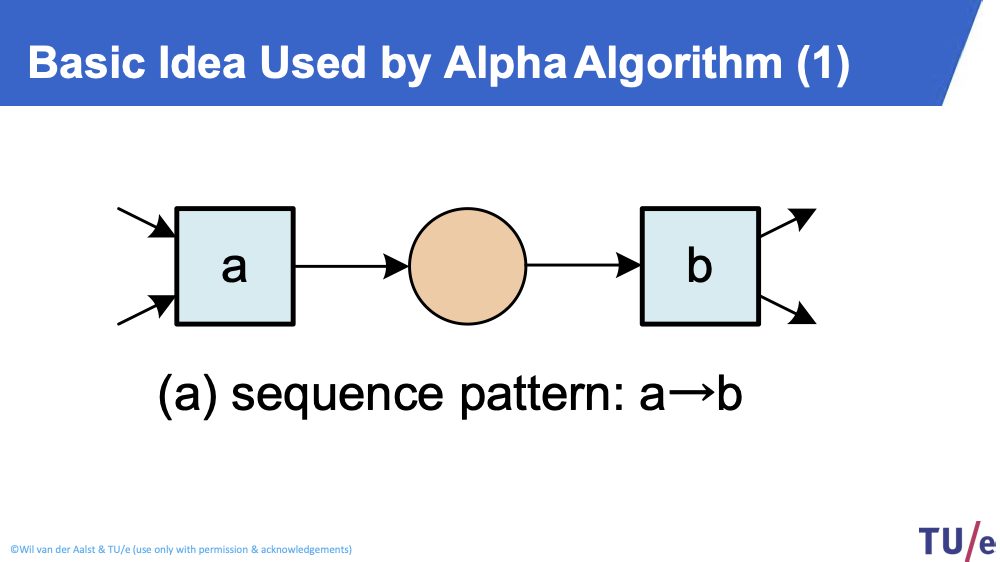

In [50]:
display(Image(pm_slides+'sequencePattern.png',width=700))

2. The combination of `->` and `#` relations allow us to learn the
   - __XOR-split__ and
   - __XOR-join__ patterns

In [51]:
#display(Image(pm_slides+'xorsplit.png',width=700))

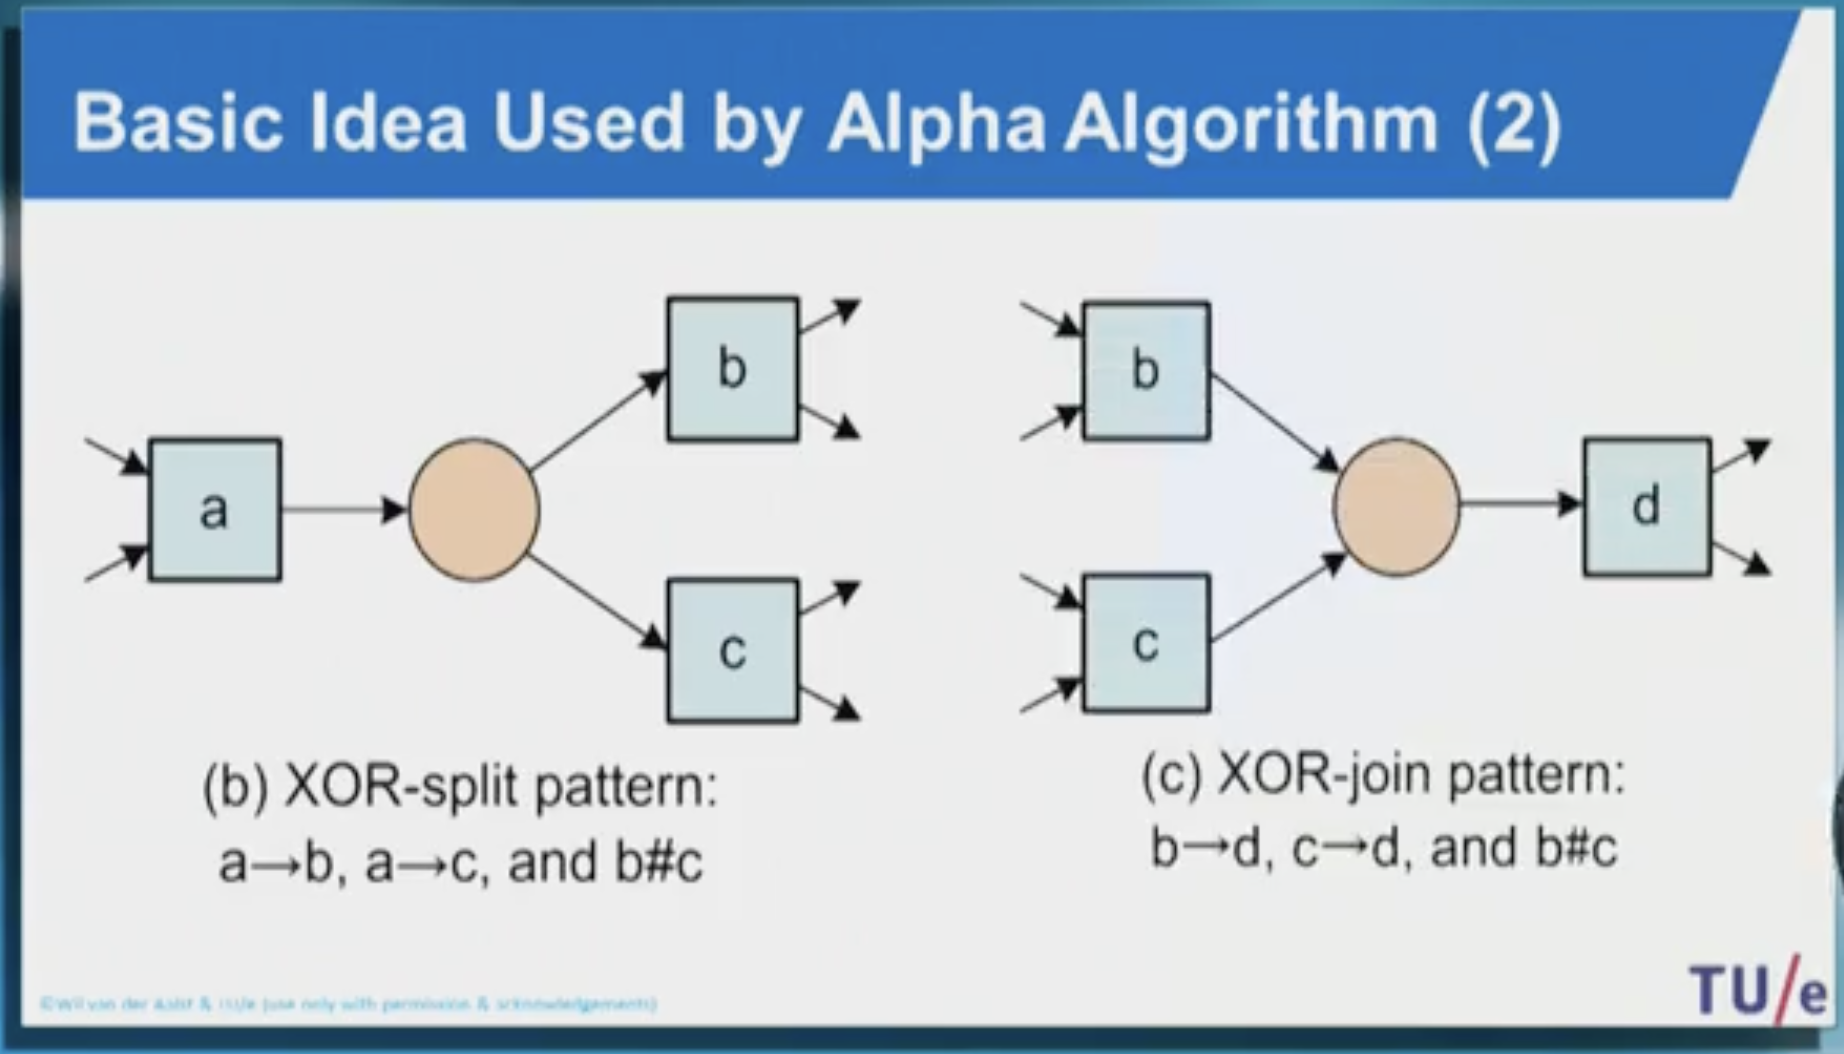

In [52]:
display(Image(pm_slides+'xorsplit2.png',width=700))

3. The combination of `->` and `||` relations allow us to learn the
   - __AND-split__ and
   - __AND-join__ patterns

In [53]:
#display(Image(pm_slides+'andSplit.png',width=700))

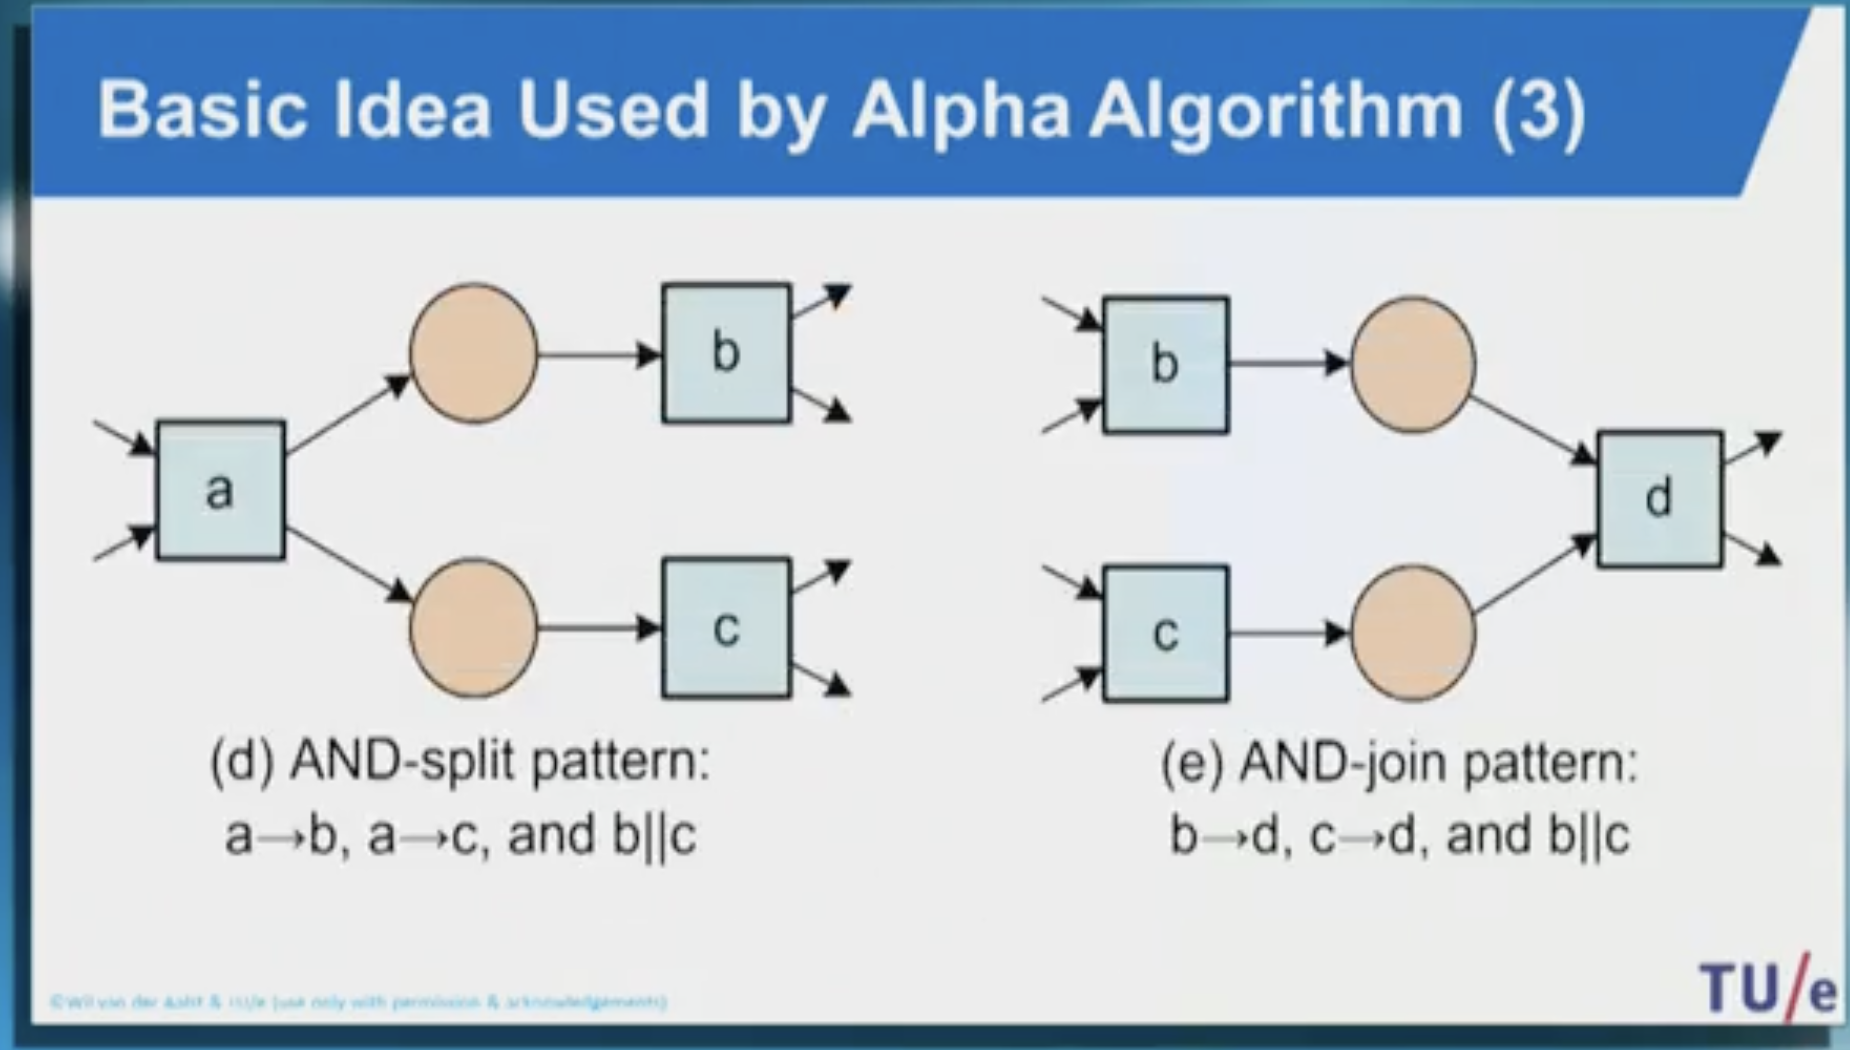

In [54]:
display(Image(pm_slides+'andSplit2.png',width=700))

Intuitively, the algorithm:
- first builds all such relations for each pair of activities
  - These are collected in the __footprint__ of the log 
- then, based on such relations, it learns these 3 patterns

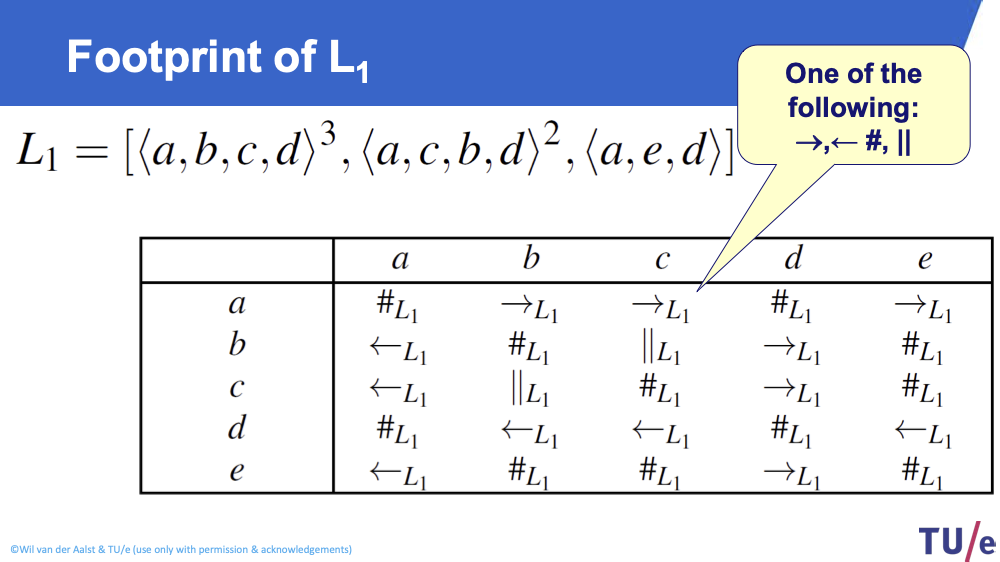

In [55]:
display(Image(pm_slides+'footprint.png',width=700))

The __alpha miner guarantees__ that:
- the footprint of the source log
- the footprint of all logs generable by a model
<br/>
__have the same footprint__

That is, the alpha miner is perfect in finding and modeling these _local dependencies_

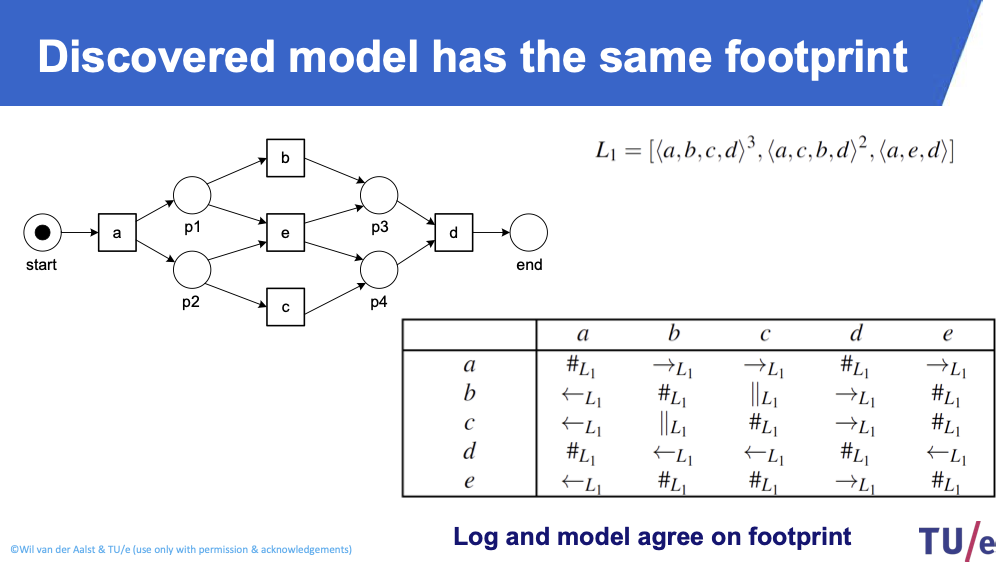

In [56]:
display(Image(pm_slides+'sameFootprint.png',width=700))

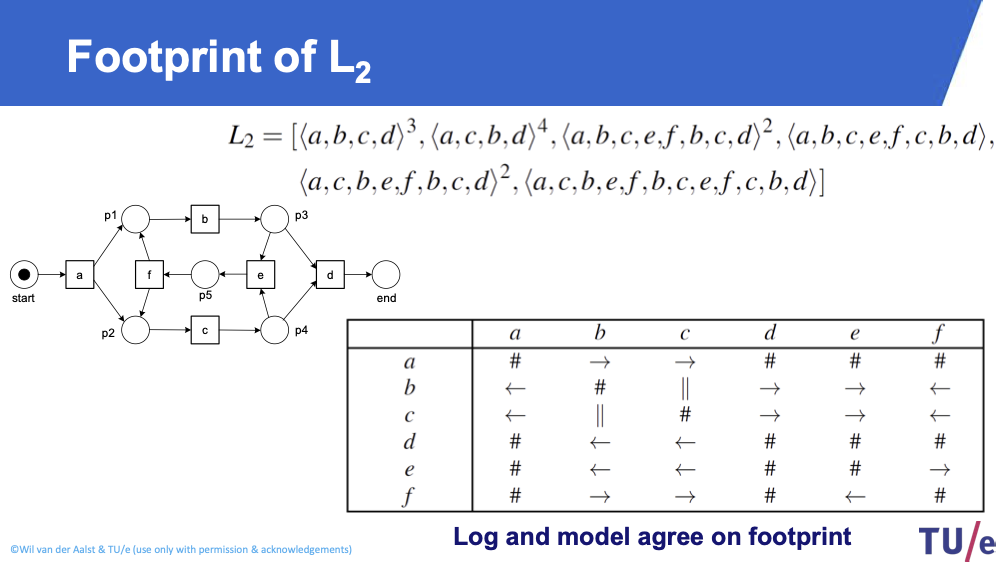

In [57]:
display(Image(pm_slides+'sameFootprint2.png',width=700))

## Alpha miner: the algorithm

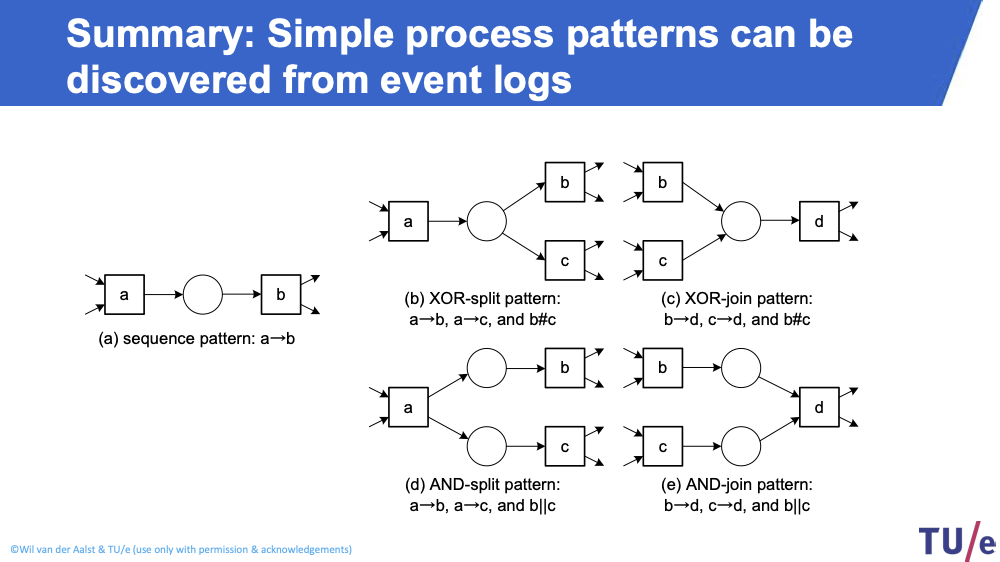

In [58]:
display(Image(pm_slides+'patterns.png',width=800))

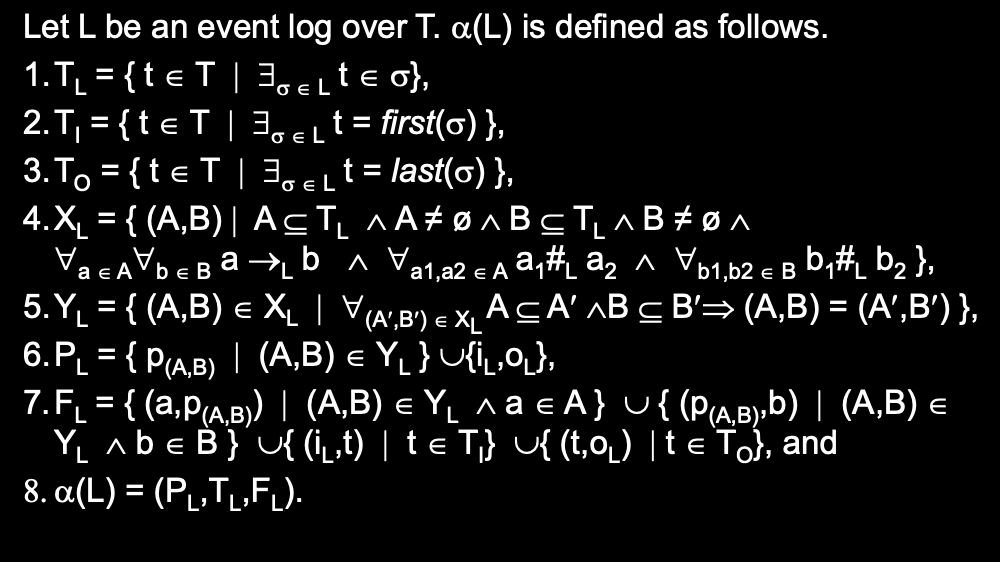

In [59]:
display(Image(pm_slides+'algorithm.png',width=700))

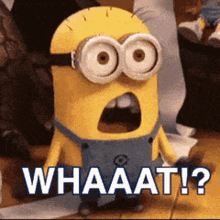

In [60]:
display(Image(pm_slides+'whaat-huh.gif',width=400))

It is actually _simple_. Despite being simple, it can find complex notions like:
- concurrency
- choice
- loops

---

Algorithm: input event log $T$, output Petri net $\alpha(L)$.

First we __discover the transitions__ in the PN (the rectangles corresponding to the activities):
1. Scan event log to extract the activities $T_L$ in the log $L$
   - These will be the transitions in the PN
2. Scan event log extract the activities $T_I$ appearing at least once is first
   - These will be the initial transitions in the PN
3. Scan event log extract the activities $T_O$ appearing at least once is last
   - These will be the final/end transitions in the PN

Now we __disover the places__. In particular:
 - We discover pairs $p=(A,B)$ where:
 - a pair $p$ corresponds to a place in the PN
 - The set of transitions/activities $A$ are the __input__ transitions of $p$
 - The set of transitions/activities $B$ are the __output__ transitions of $p$





4. Calculate all pairs $(A,B)$ such that
   - For any two activties  $a_i,a_j \in A$, &nbsp;$a_1\#_L a_2$     &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; (they shall never follow one another)
   - For any two activties $b_i,b_j \in B$, &nbsp;$b_1\#_L b_2$     &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; (they shall never follow one another)
   - For any two activties $a \in A$ and $b\in B$, &nbsp; $a\rightarrow_L b$ &nbsp;&nbsp; ($b$ must directly follow $a$).
5. Keep only the pairs $(A,B)$ that are _maximal
   - If $A' \subset A$ and $B' \subset B$, then $(A',B')$ satisfies the conditions of point 4 as well
   - But we want to focus only on the maximal ones: less places, more interpretable model
6. Make the final list of places:
   - Each pair $(A,B)$ becomes a place $P_{(A,B)}$ from points 4,5 becomes a place
   - Add an initial place $i_L$ and terminal place $o_L$
7. Connect transitions from points 1-3 with places from points 4,5
   - Given a place $p_{(A,B)}$, connect it with all activities in $A$ and $B$
     - connect each activity $a\in A$ towards $p_{(A,B)}$
     - connect $p_{(A,B)}$ towards each activity $b\in B$
   - Connect the initial place $i_L$ towards all initial transitions $T_I$
   - Connect all final transitions $T_O$ towards the final place $o_L$
8. Just return the computed PN and its initial and final places


---

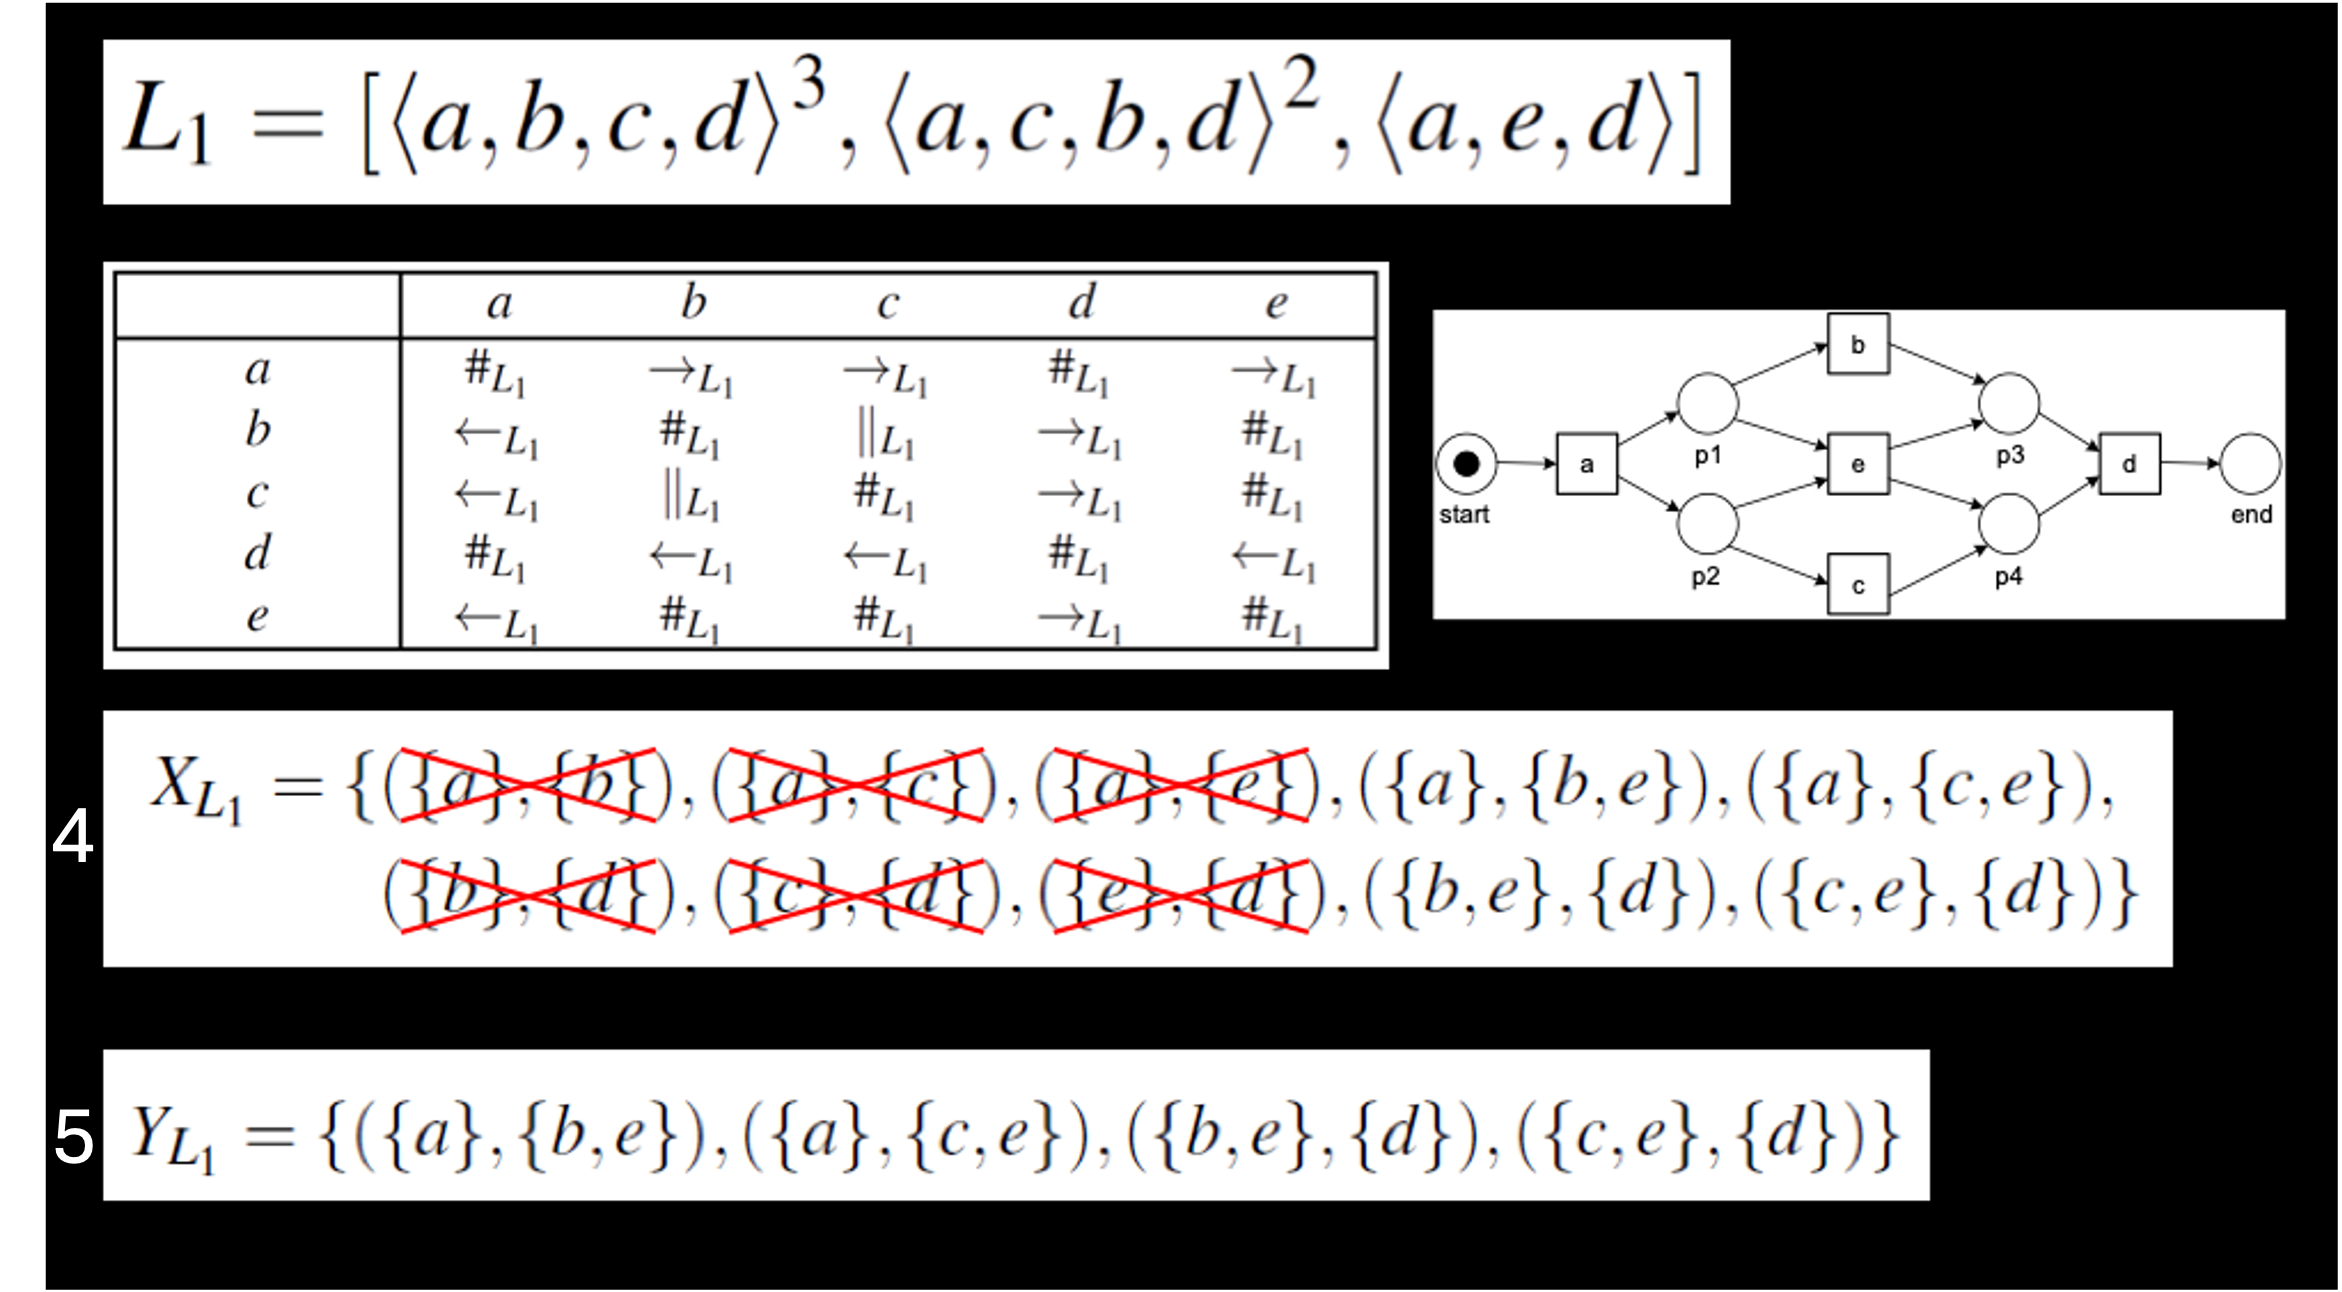

In [61]:
display(Image(pm_slides+'alphaExecution.png',width=700))

### Let's mine L1 with pm4py

In [62]:
#use pm4py to mine L_1
import pandas as pd
import pm4py
event_log=pd.read_csv("L1.csv",sep=";")
event_log['timestamp']=pd.to_datetime(event_log['timestamp'])
event_log.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   case_id    23 non-null     int64         
 1   activity   23 non-null     object        
 2   timestamp  23 non-null     datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 680.0+ bytes


In [63]:
event_log = pm4py.format_dataframe(event_log, case_id='case_id', activity_key='activity', timestamp_key='timestamp')
start_activities = pm4py.get_start_activities(event_log)
end_activities = pm4py.get_end_activities(event_log)
print("Start activities: {}\nEnd activities: {}\n".format(start_activities, end_activities))

print('The case_id 2 in the formatted dataframe')
event_log[event_log.case_id==2]

Start activities: {'a': 6}
End activities: {'d': 6}

The case_id 2 in the formatted dataframe


case_id activity                           timestamp case:concept:name  \
4        2        a 1970-01-01 00:00:00.000000001+00:00                 2   
5        2        b 1970-01-01 00:00:00.000000002+00:00                 2   
6        2        c 1970-01-01 00:00:00.000000003+00:00                 2   
7        2        d 1970-01-01 00:00:00.000000004+00:00                 2   

  concept:name                      time:timestamp  @@index  @@case_index  
4            a 1970-01-01 00:00:00.000000001+00:00        4             1  
5            b 1970-01-01 00:00:00.000000002+00:00        5             1  
6            c 1970-01-01 00:00:00.000000003+00:00        6             1  
7            d 1970-01-01 00:00:00.000000004+00:00        7             1

First we compute the footprints of the log

In [64]:
footprints=pm4py.discovery.discover_footprints(event_log)
footprints.keys()

dict_keys(['dfg', 'sequence', 'parallel', 'activities', 'start_activities', 'end_activities', 'min_trace_length'])

In [65]:
for key in footprints.keys():
    print(key+":")
    print(footprints[key])
    print()

dfg:
{('a', 'b'): 3, ('a', 'c'): 2, ('a', 'e'): 1, ('b', 'c'): 3, ('b', 'd'): 2, ('c', 'b'): 2, ('c', 'd'): 3, ('e', 'd'): 1}

sequence:
{('a', 'c'), ('e', 'd'), ('c', 'd'), ('a', 'e'), ('a', 'b'), ('b', 'd')}

parallel:
{('b', 'c'), ('c', 'b')}

activities:
{'d', 'c', 'e', 'b', 'a'}

start_activities:
{'a'}

end_activities:
{'d'}

min_trace_length:
3



Choice is not provided:
- Looking at the footprints talbes, in each entry we have either sequence, or parallel or choice
- Therefore, choice can be inferred

Now we actually mine the model

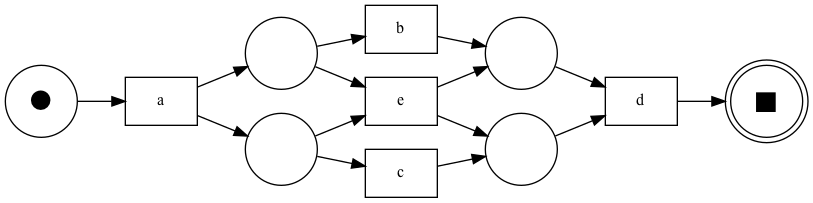

In [66]:
#pn, im, fm = pm4py.discover_petri_net_inductive(event_log)
pn, im, fm = pm4py.discover_petri_net_alpha(event_log)
places_list=list(pn.places)


pm4py.view_petri_net(pn, im, fm)

### Let's mine L3 by hand, and with pm4py

- What are the footprints of L3?
- Perform all 8 steps
  - What are the Transitions (steps 1-3)?
  - What are the pairs from steps 4-5?
  - What are the places?
  - Connect transitions and places 

## Alpha miner: limitations

### Implicit places


In [ ]:
display(Image(pm_slides+'implicitPlaces.png',width=700))

The two green places are _implicit, that is _useless_
- Removing them does not change the behavior of the model
- The just add useless complexity

### Loops of length 1  - can be fixed

In [ ]:
display(Image(pm_slides+'loops1.png',width=700))

### Loops of length 2  - can be fixed 

In [ ]:
display(Image(pm_slides+'loops2.png',width=700))

### Trouble in handling non-local dependencies

In [68]:
event_log=pd.read_csv("L_nonLocalDep.csv",sep=";")
event_log['timestamp']=pd.to_datetime(event_log['timestamp'])
event_log = pm4py.format_dataframe(event_log, case_id='case_id', activity_key='activity', timestamp_key='timestamp')
event_log

case_id activity                           timestamp case:concept:name  \
0        1        a 1970-01-01 00:00:00.000000001+00:00                 1   
1        1        b 1970-01-01 00:00:00.000000002+00:00                 1   
2        1        c 1970-01-01 00:00:00.000000003+00:00                 1   
3        2        b 1970-01-01 00:00:00.000000001+00:00                 2   
4        2        c 1970-01-01 00:00:00.000000002+00:00                 2   
5        2        e 1970-01-01 00:00:00.000000003+00:00                 2   

  concept:name                      time:timestamp  @@index  @@case_index  
0            a 1970-01-01 00:00:00.000000001+00:00        0             0  
1            b 1970-01-01 00:00:00.000000002+00:00        1             0  
2            c 1970-01-01 00:00:00.000000003+00:00        2             0  
3            b 1970-01-01 00:00:00.000000001+00:00        3             1  
4            c 1970-01-01 00:00:00.000000002+00:00        4             1  
5            e 1970-01-01 00:00:00.000000003+00:00        5             1

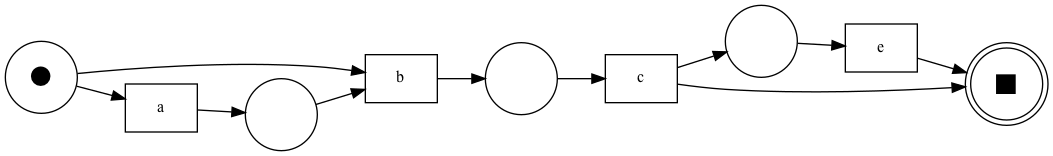

In [69]:
pn, im, fm = pm4py.discover_petri_net_alpha(event_log)
places_list=list(pn.places)


pm4py.view_petri_net(pn, im, fm)

It can express the two traces
- a,c,d
- b,c,e

Unfortunately, it also __erroneously covers__
- a,c,e
- b,c,d

We would like to mine this model

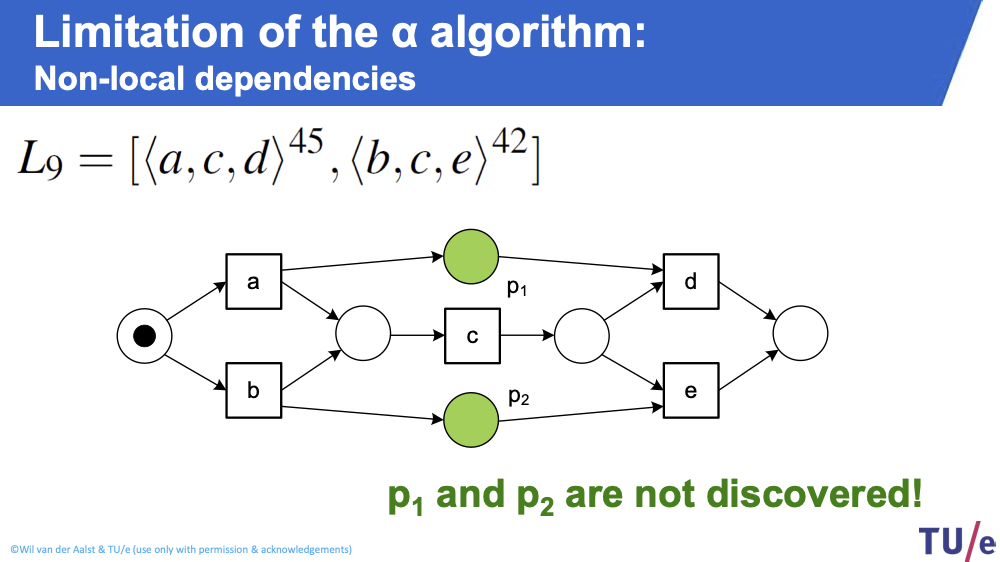

In [72]:
display(Image(pm_slides+'nonLocal.png',width=700))

### We cannot have more than 1 transition with same label

In [ ]:
display(Image(pm_slides+'aa.png',width=700))